In [9]:
import pandas as pd


In [11]:
df = pd.read_excel('dataset.xlsx')


In [13]:
print(df.head())

      id              added_time  rating     ratable  ratable_id  \
0  15694 2022-08-26 08:08:12.880       5  onboarding       43605   
1  15692 2022-08-26 07:57:35.887       3  onboarding       20603   
2  15691 2022-08-26 07:47:27.433       5  onboarding       44120   
3  15690 2022-08-26 07:43:01.103       5  onboarding       43277   
4  15689 2022-08-26 07:42:09.630       5  onboarding       43595   

                remark isp_name  
0                  NaN        A  
1  erpp_reason_slw_spd        B  
2                  NaN        B  
3                  NaN        C  
4                  NaN        D  


In [15]:
df.isnull().sum()


id               0
added_time       0
rating           0
ratable          0
ratable_id       0
remark        6055
isp_name         0
dtype: int64

In [17]:
df['remark'] = df['remark'].fillna('No Remark')

In [19]:
print(df.head())


      id              added_time  rating     ratable  ratable_id  \
0  15694 2022-08-26 08:08:12.880       5  onboarding       43605   
1  15692 2022-08-26 07:57:35.887       3  onboarding       20603   
2  15691 2022-08-26 07:47:27.433       5  onboarding       44120   
3  15690 2022-08-26 07:43:01.103       5  onboarding       43277   
4  15689 2022-08-26 07:42:09.630       5  onboarding       43595   

                remark isp_name  
0            No Remark        A  
1  erpp_reason_slw_spd        B  
2            No Remark        B  
3            No Remark        C  
4            No Remark        D  


In [21]:
df['added_time'] = pd.to_datetime(df['added_time'])


In [23]:
print(df.head())

      id              added_time  rating     ratable  ratable_id  \
0  15694 2022-08-26 08:08:12.880       5  onboarding       43605   
1  15692 2022-08-26 07:57:35.887       3  onboarding       20603   
2  15691 2022-08-26 07:47:27.433       5  onboarding       44120   
3  15690 2022-08-26 07:43:01.103       5  onboarding       43277   
4  15689 2022-08-26 07:42:09.630       5  onboarding       43595   

                remark isp_name  
0            No Remark        A  
1  erpp_reason_slw_spd        B  
2            No Remark        B  
3            No Remark        C  
4            No Remark        D  


In [23]:
df = pd.get_dummies(df, columns=['isp_name'])


In [25]:
print(df.head())

      id              added_time  rating     ratable  ratable_id  \
0  15694 2022-08-26 08:08:12.880       5  onboarding       43605   
1  15692 2022-08-26 07:57:35.887       3  onboarding       20603   
2  15691 2022-08-26 07:47:27.433       5  onboarding       44120   
3  15690 2022-08-26 07:43:01.103       5  onboarding       43277   
4  15689 2022-08-26 07:42:09.630       5  onboarding       43595   

                remark  isp_name_A  isp_name_AA  isp_name_AB  isp_name_AC  \
0            No Remark        True        False        False        False   
1  erpp_reason_slw_spd       False        False        False        False   
2            No Remark       False        False        False        False   
3            No Remark       False        False        False        False   
4            No Remark       False        False        False        False   

   ...  isp_name_R  isp_name_S  isp_name_T  isp_name_U  isp_name_V  \
0  ...       False       False       False       False    

In [27]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [1]:
import sqlite3

In [5]:
conn = sqlite3.connect('database.db')  # Change the name of the database as needed
cursor = conn.cursor()

In [25]:
df.to_sql('table_1', conn, if_exists='replace', index=False)

6216

In [29]:
query = "SELECT * FROM table_1 LIMIT 5"  
df_sql = pd.read_sql_query(query, conn)

# Display the result
df_sql.head()


,id,added_time,rating,ratable,ratable_id,remark,isp_name
0,15694,2022-08-26 08:08:12.880000,5,onboarding,43605,No Remark,A
1,15692,2022-08-26 07:57:35.887000,3,onboarding,20603,erpp_reason_slw_spd,B
2,15691,2022-08-26 07:47:27.433000,5,onboarding,44120,No Remark,B
3,15690,2022-08-26 07:43:01.103000,5,onboarding,43277,No Remark,C
4,15689,2022-08-26 07:42:09.630000,5,onboarding,43595,No Remark,D


In [71]:
query = "SELECT isp_name, AVG(rating) AS avg_rating, COUNT(*) AS total_reviews FROM table_1 GROUP BY isp_name ORDER BY avg_rating DESC, total_reviews desc"
df_sql = pd.read_sql_query(query, conn)
df_sql

,isp_name,avg_rating,total_reviews
0,R,5.000000,217
1,D,5.000000,166
2,AF,5.000000,123
3,K,5.000000,98
4,AL,5.000000,84
5,AI,5.000000,10
6,Z-DONT-Netlink2,5.000000,1
7,L,4.994975,199
8,V,4.968504,127
9,Z,4.965116,86


In [73]:
query = "SELECT remark, COUNT(*) AS total, AVG(rating) AS avg_rating FROM table_1 GROUP BY remark ORDER BY total DESC"
df_sql = pd.read_sql_query(query, conn)
df_sql

,remark,total,avg_rating
0,No Remark,6055,4.893642
1,erpp_reason_slw_spd,75,2.173333
2,erpp_reason_lng_inst_tm,25,2.560000
3,erpp_reason_bad_srvc,23,1.521739
4,erpp_reason_othr,20,2.450000
5,"erpp_reason_slw_spd,erpp_reason_bad_srvc",7,1.857143
6,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",4,1.500000
7,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",3,2.333333
8,"erpp_reason_slw_spd,erpp_reason_lng_inst_tm",2,3.000000
9,"erpp_reason_slw_spd,erpp_reason_othr",1,1.000000


In [83]:
query = """
SELECT 
    isp_name, 
    COUNT(id) AS total_customers,
    AVG(rating) AS average_rating,
    MIN(rating) AS minimum_rating,
    MAX(rating) AS maximum_rating,
    SUM(CASE WHEN rating <= 3 THEN 1 ELSE 0 END) AS low_ratings,
    SUM(CASE WHEN rating >= 4 THEN 1 ELSE 0 END) AS high_ratings
FROM 
    table_1
GROUP BY 
    ISP_Name
ORDER BY 
    average_rating DESC"""
df_sql = pd.read_sql_query(query, conn)
df_sql.tail()


,isp_name,total_customers,average_rating,minimum_rating,maximum_rating,low_ratings,high_ratings
38,S,360,4.625000,1,5,40,320
39,AN,40,4.500000,1,5,5,35
40,AC,136,4.485294,0,5,18,118
41,W,76,4.302632,1,5,13,63
42,AA,1,4.000000,4,4,0,1


In [121]:
query = """SELECT strftime('%Y-%m', added_time) AS month, COUNT(*) AS onboardings
FROM table_1
GROUP BY month
ORDER BY month"""
df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)


,month,onboardings
0,2022-06,2589
1,2022-07,1903
2,2022-08,1724


In [131]:
query = """SELECT 
    isp_name,
    strftime('%Y-%m', added_time) AS month,  
    COUNT(id) AS total_customers,
    AVG(rating) AS average_rating,
    MIN(rating) AS minimum_rating,
    MAX(rating) AS maximum_rating,
    SUM(CASE WHEN rating <= 2 THEN 1 ELSE 0 END) AS low_ratings,
    SUM(CASE WHEN rating >= 4 THEN 1 ELSE 0 END) AS high_ratings
FROM 
    table_1
GROUP BY 
    isp_name,
    strftime('%Y-%m', added_time)
ORDER BY 
    month DESC, average_rating DESC""" 
df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)



,isp_name,month,total_customers,average_rating,minimum_rating,maximum_rating,low_ratings,high_ratings
0,V,2022-08,31,5.0,5,5,0,31
1,R,2022-08,69,5.0,5,5,0,69
2,L,2022-08,40,5.0,5,5,0,40
3,K,2022-08,19,5.0,5,5,0,19
4,D,2022-08,55,5.0,5,5,0,55
5,AN,2022-08,1,5.0,5,5,0,1
6,AM,2022-08,4,5.0,5,5,0,4
7,AL,2022-08,13,5.0,5,5,0,13
8,AK,2022-08,30,5.0,5,5,0,30
9,AJ,2022-08,32,5.0,5,5,0,32


In [137]:
query = """SELECT 
    strftime('%Y-%m', added_time) AS month, 
    AVG(rating) AS average_rating,
    MIN(rating) AS minimum_rating,
    MAX(rating) AS maximum_rating,
    COUNT(DISTINCT id) AS total_customers
FROM 
    table_1
GROUP BY 
    strftime('%Y-%m', added_time) 
ORDER BY 
    month DESC"""

df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)



,month,average_rating,minimum_rating,maximum_rating,total_customers
0,2022-08,4.805684,0,5,1724
1,2022-07,4.817656,0,5,1903
2,2022-06,4.837003,1,5,2589


In [139]:
query = """ SELECT 
    isp_name,
    COUNT(*) AS total_erpp_remarks
FROM table_1

WHERE remark LIKE '%erpp_reason%' 
GROUP BY 
    isp_name
ORDER BY 
    total_erpp_remarks DESC""" 

df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)

,isp_name,total_erpp_remarks
0,S,26
1,O,26
2,I,14
3,E,13
4,N,9
5,H,9
6,Q,7
7,G,7
8,W,6
9,AN,6


In [141]:
query = """SELECT 
    remark,
    COUNT(*) AS total_occurrences,
    SUM(CASE WHEN rating <= 2 THEN 1 ELSE 0 END) AS low_rating_occurrences,
    ROUND(SUM(CASE WHEN rating <= 2 THEN 1 ELSE 0 END) * 1.0 / COUNT(*) * 100, 2) AS low_rating_percentage
FROM 
    table_1
WHERE 
    remark != 'No Remark'  
GROUP BY 
    remark
ORDER BY 
    low_rating_percentage DESC"""

df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)


,remark,total_occurrences,low_rating_occurrences,low_rating_percentage
0,"erpp_reason_slw_spd,erpp_reason_othr",1,1,100.00
1,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",1,1,100.00
2,erpp_reason_bad_srvc,23,19,82.61
3,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",4,3,75.00
4,"erpp_reason_slw_spd,erpp_reason_bad_srvc",7,5,71.43
5,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",3,2,66.67
6,erpp_reason_slw_spd,75,46,61.33
7,erpp_reason_lng_inst_tm,25,10,40.00
8,erpp_reason_othr,20,7,35.00
9,"erpp_reason_slw_spd,erpp_reason_lng_inst_tm",2,0,0.00


In [143]:
query = """SELECT 
    remark,
    COUNT(*) AS total_remarks,
    ROUND(COUNT(*) * 1.0 / (SELECT COUNT(*) FROM table_1) * 100, 2) AS percentage_distribution
FROM 
    table_1
    GROUP BY 
    remark
ORDER BY 
    percentage_distribution DESC"""


In [145]:
df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)

,remark,total_remarks,percentage_distribution
0,No Remark,6055,97.41
1,erpp_reason_slw_spd,75,1.21
2,erpp_reason_lng_inst_tm,25,0.40
3,erpp_reason_bad_srvc,23,0.37
4,erpp_reason_othr,20,0.32
5,"erpp_reason_slw_spd,erpp_reason_bad_srvc",7,0.11
6,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",4,0.06
7,"erpp_reason_slw_spd,erpp_reason_bad_srvc,erpp_...",3,0.05
8,"erpp_reason_slw_spd,erpp_reason_lng_inst_tm",2,0.03
9,"erpp_reason_slw_spd,erpp_reason_othr",1,0.02


In [147]:
query = """SELECT 
    isp_name,
    COUNT(*) AS total_records,
    ROUND(COUNT(*) * 1.0 / (SELECT COUNT(*) FROM table_1) * 100, 2) AS percentage_distribution
FROM 
    table_1
GROUP BY 
    isp_name
ORDER BY 
    percentage_distribution DESC"""

df_sql = pd.read_sql_query(query, conn)
df_sql.head(10)


,isp_name,total_records,percentage_distribution
0,O,542,8.72
1,H,507,8.16
2,I,366,5.89
3,S,360,5.79
4,B,342,5.50
5,J,338,5.44
6,E,259,4.17
7,N,248,3.99
8,R,217,3.49
9,L,199,3.20


In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud for remarks
text = ' '.join(df['remark'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [153]:
 from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [155]:
!pip install wordcloud

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

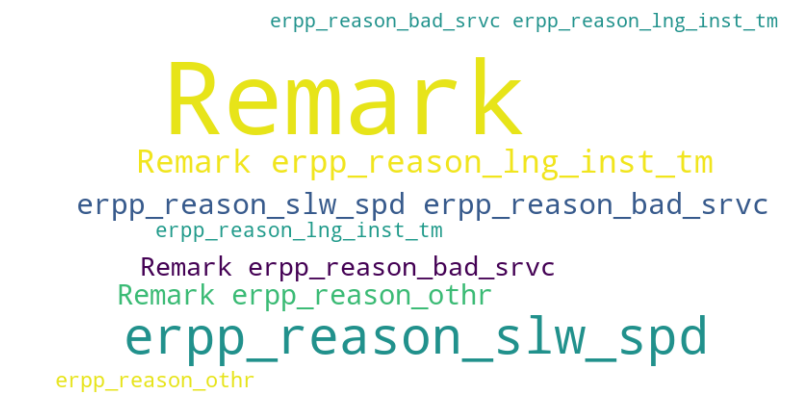

In [159]:
text = ' '.join(df['remark'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\np110\AppData\Local\Temp\ipykernel_32052\465841823.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='flare')


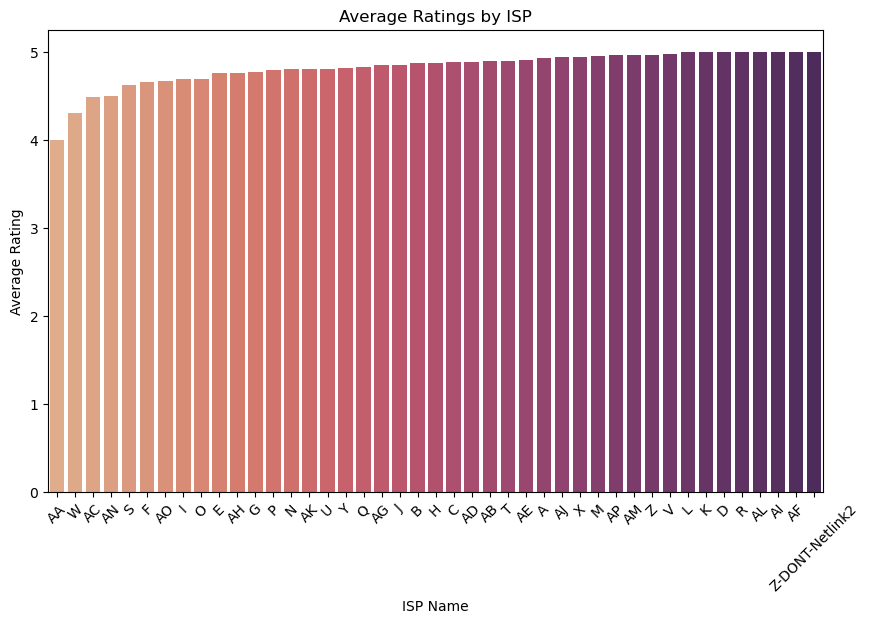

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Average Ratings by ISP (Bar Chart)
average_ratings = df.groupby('isp_name')['rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette='flare')
plt.title('Average Ratings by ISP')
plt.xlabel('ISP Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()



In [ ]:
df = pd.read_csv('dataset.csv')


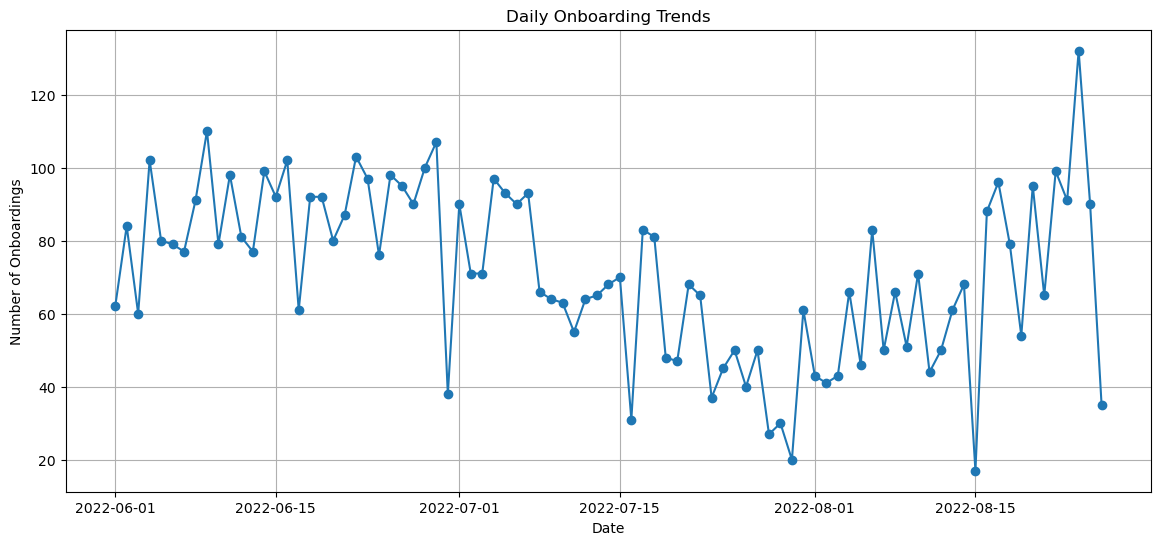

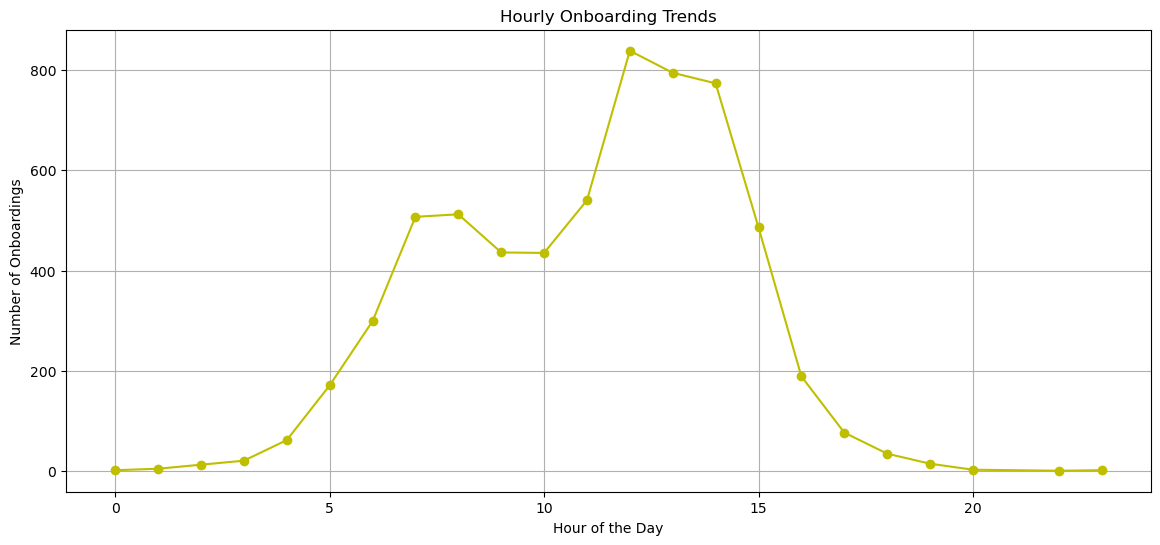

In [180]:
# Convert 'added_time' to datetime if not already done
df['added_time'] = pd.to_datetime(df['added_time'])

# Filter for onboarding events
df_onboarding = df[df['ratable'] == 'onboarding']
df_onboarding['date'] = df_onboarding['added_time'].dt.date
df_onboarding['hour'] = df_onboarding['added_time'].dt.hour

# Daily Onboarding Trends
plt.figure(figsize=(14, 6))
df_onboarding_daily = df_onboarding.groupby('date').size()
plt.plot(df_onboarding_daily.index, df_onboarding_daily.values, marker='o')
plt.title('Daily Onboarding Trends')
plt.xlabel('Date')
plt.ylabel('Number of Onboardings')
plt.grid(True)
plt.show()

# Hourly Onboarding Trends
plt.figure(figsize=(14, 6))
df_onboarding_hourly = df_onboarding.groupby('hour').size()
plt.plot(df_onboarding_hourly.index, df_onboarding_hourly.values, marker='o', color='y')
plt.title('Hourly Onboarding Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Onboardings')
plt.grid(True)
plt.show()


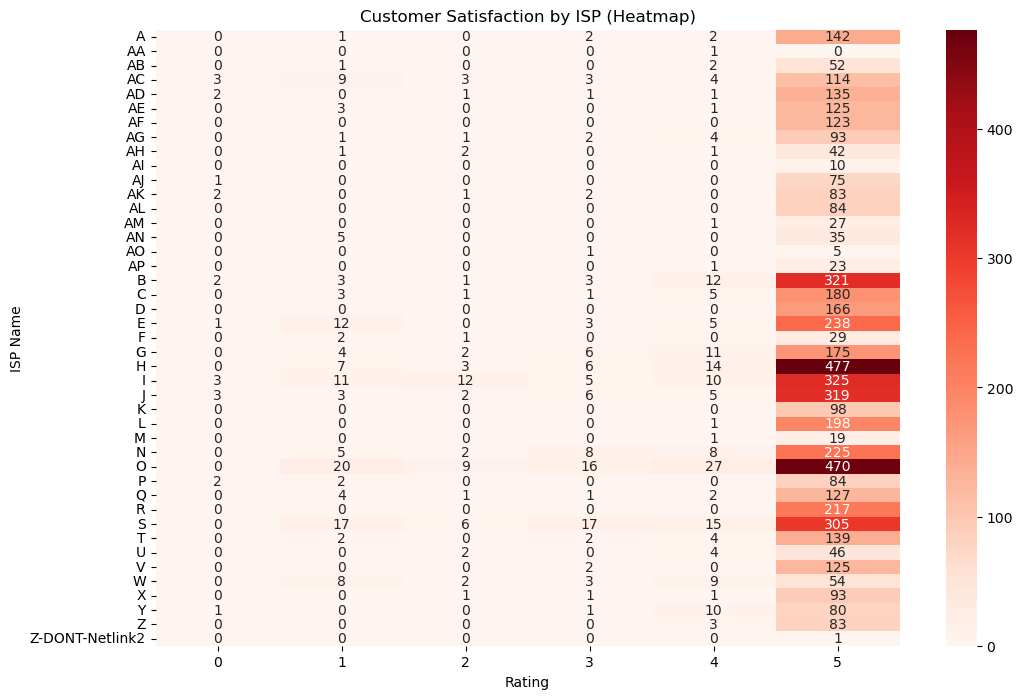

In [190]:
# Pivot table for ratings by ISP
ratings_by_isp = df.pivot_table(index='isp_name', columns='rating', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(ratings_by_isp, annot=True, cmap='Reds', fmt='d')
plt.title('Customer Satisfaction by ISP (Heatmap)')
plt.xlabel('Rating')
plt.ylabel('ISP Name')
plt.show()


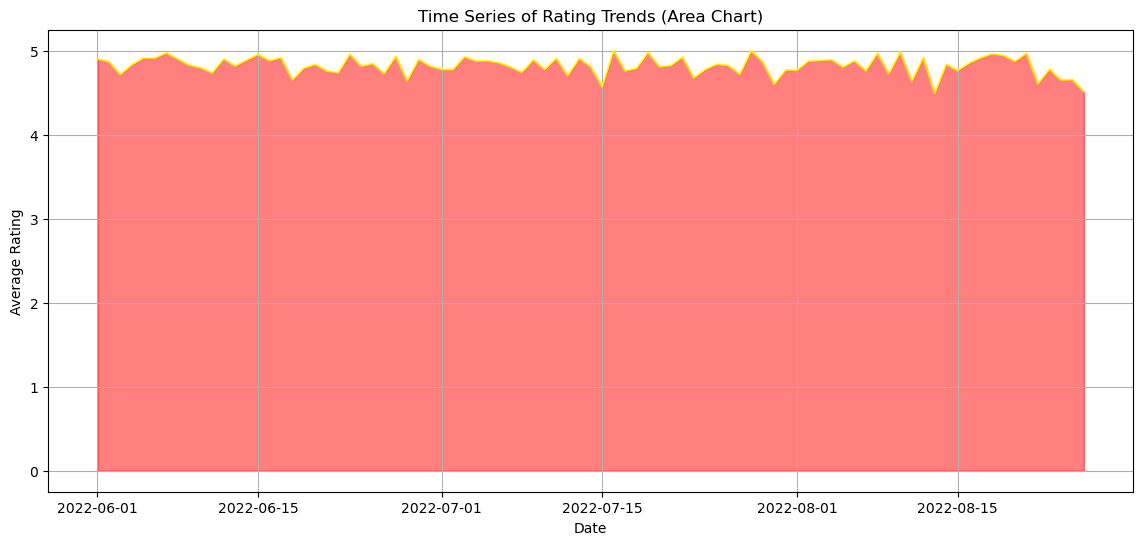

In [194]:
# Time Series of Rating Trends
df['date'] = df['added_time'].dt.date
time_series = df.groupby('date')['rating'].mean()
plt.figure(figsize=(14, 6))
plt.fill_between(time_series.index, time_series.values, color='red', alpha=0.5)
plt.plot(time_series.index, time_series.values, color='yellow', alpha=0.8)
plt.title('Time Series of Rating Trends (Area Chart)')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [196]:
# Group data by hour and calculate average ratings for each hour
hourly_ratings = df.groupby('hour')['rating'].mean()

# Plot the hourly trend
plt.figure(figsize=(12, 6))
plt.plot(hourly_ratings.index, hourly_ratings.values, marker='o', color='g')
plt.title('Average Ratings by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()



KeyError: 'hour'